<h1>Newton's method</h1>

<h2>Bisection</h2>

<p>The bisection method has many advantages:</p>

<ul><li>given a bracket, can be guaranteed to converge</li></ul>

<ul><li>will find a root or the next best thing in floating point</li></ul>

<p>However, ...</p>

<ul><li>slow -- many steps</li></ul>

<ul><li>needs a bracket</li></ul>

<ul><li>won't work with roots of functions like $f(x) = (x-2)^2$</li></ul>

<h2>Newton's method</h2>

<p>See this <a href="http://calculuswithjulia.github.io/derivatives/newtons_method.html#Examples">algorithm</a></p>

<p>Basic idea: approximate function by tangent line and find that intersection.</p>

<p>More formally, Let $r$ be a zero of $f(x)$. Further, suppose $r$ is a <em>simple</em> zero where $f'(r) \neq 0$.</p>

<p>Suppose $x$ is an approximation to $r$. That is, suppose $r = x + h$ for some small $h$, then using Taylor's theorem about $x$, we have:</p>

<p>$$ 0 = f(r) = f(x+h) = f(x) + f'(x) \cdot h + \mathcal{O}(h^2) $$</p>

<p>If we were to just ignore the error term and solve for $h$, we would get:</p>

<p>$$ h \approx -f(x)/f'(x) $$</p>

<p>So $r \approx x - f(x)/f'(x)$. (Not necessarily exactly, but this should be closer.)</p>

<p>Iterating the above process yields this algorithm:</p>

<p>$$ x_{n+1} = x_n - f(x_n) / f'(x_n), \quad x_0 \text{ should be near answer} $$</p>

<h3>Example</h3>

<p>Solve $x - 2\sin(x) - 1 = 0$ near $2$.</p>

<p>Start with $x = 2$. We note that $f'(x) = 1 - 2\cos(x)$</p>

In [ ]:
f(x) = x - 2sin(x) - 1
fp(x) = 1 - 2cos(x)
x = 2
x = x - f(x) / fp(x)

2.4467596355713885

In [ ]:
x = x - f(x) / fp(x)

2.3812138074297873

In [ ]:
x = x - f(x) / fp(x)

2.380061647086649

In [ ]:
x = x - f(x) / fp(x)

2.3800612731393787

In [ ]:
x = x - f(x) / fp(x)

2.380061273139339

In [ ]:
x = x - f(x) / fp(x)

2.380061273139339

<h3>Termination</h3>

<p>When do we stop?</p>

<p>- We stopped when the method stabilized to 16 <em>or so</em> digits</p>

<p>- There is no guarantee it will stabilize though, so we should guard against that</p>

<p>- The goal is to solve $f(r) = 0$, so finding values where $f(r)$ is close to $0$ should also be a good criteria</p>

<h3>Let's implement it...</h3>

In [ ]:
function nm(f, fp, x)
  ## Fill me in...
end

nm (generic function with 1 method)

<h3>Programming a stopping value</h3>

<p>The basic algorithm is simple:</p>

<p>As long as we have not converged or tried to many times, just update $x$ via <code>x = x - f(x) / fp(x)</code>.</p>

<p>The book (p82) has these stopping criteria for converging:</p>

<p>Either</p>

<p>$$ |x_{n+1} - x_n| \leq \delta, \quad \text{ or } |f(x_{n+1})| \leq \epsilon $$</p>

<p>The first says stop if the <code>x</code>'s don't change much. This is what we see in the output. The second says stop if the function value is small.</p>

<p>But this isn't really enough. First, we should add in a bound on the number of steps.  But, let's look at the latter point. It says stop if the function value should be close to 0. But what is close to zero? Answer: it depends on $x$!</p>

<p>We have in general $f(fl(x)) = f(x\cdot(1 + \delta)) \approx f(x) + f'(x) x \delta$. This value depends on $x$! So, it is not unusual to have a third tolerance depending on $x$. For example, this check on convergence comes from <code>quadgk</code>:</p>

<blockquote><p><code>while E > abstol && E > reltol * nrm(I) && numevals < maxevals</code> </p></blockquote>

<p><code>E</code> is the error and <code>numevals</code> the number of evaluations. The <code>nrm(I)</code> is <em>basically</em> $|x|$. So this checks that $E$ isn't small and $E$ is not small relative to $|x|$ and the number of evaluations is still small.</p>

<h3>made for floating point not exact math</h3>

<p>Look at finding the square root of 2 starting at 2. We use $f(x) = x^2 - 2$, so $x - f(x)/f'(x) = x - (x^2-2)/(2x) = x/2 - 1/x$</p>

In [ ]:
x = 2//1
x = x/2 + 1/x

3//2

In [ ]:
x = x/2 + 1/x

17//12

In [ ]:
x = x/2 + 1/x

577//408

In [ ]:
x = x/2 + 1/x

665857//470832

In [ ]:
x = x/2 + 1/x

886731088897//627013566048

In [ ]:
x = x/2 + 1/x

884250820641910783//3335157417343025984

<p>The floating point doesn't go crazy, the digits just get refined.</p>

<h3>Special cases are quite old</h3>

<p>The <a href="https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Babylonian_method">Babylonian</a> method is this algorithm:</p>

<p>$$ x_{n+1} = \frac{1}{2}(x_n + \frac{S}{x_n}). $$</p>

<p>It converges to solutions of $x^2 - S = 0$:</p>

<p>$$ x - \frac{x^2 - S}{2x} = x - \frac{x}{2} + \frac{S}{2x} = \frac{x}{2} + \frac{S}{2x} = \frac{1}{2}(x + \frac{S}{x}) $$</p>

<h2>Analysis</h2>

<p>Let $f(x)$ be our function and $r$ our root. Define $e_n = x_n - r$. We have the following expansion about $x_n$:</p>

<p>$$ f(x) = f(x_n) + f'(x_n) \cdot (x - x_n) + f''(\xi)/2 \cdot (x - x_n)^2 $$</p>

<p>Using $r$ for $x$ gives:</p>

<p>$$ 0 = f(r) = f(x_n) + f'(x_n) \cdot (r - x_n) + f''(\xi)/2 \cdot (r - x_n)^2  $$</p>

<p>Divide by $f'(x_n)$</p>

<p>$$ 0 = f(x_n)/f'(x_n) + (r - x_n) + \frac{1}{2}\frac{f''(\xi)}{f'(x_n)}(e_n)^2. $$</p>

<p>and rearrange:</p>

<p>$$ x_n - f(x_n)/f'(x_n) -r = \frac{1}{2}\frac{f''(\xi)}{f'(x_n)}(e_n)^2. $$</p>

<p>But this is just</p>

<p>$$ e_{n+1} = \frac{1}{2}\frac{f''(\xi)}{f'(x_n)}(e_n)^2. $$</p>

<h3>Theorem 1 (p85)</h3>

<blockquote><p>Let $f$ be $C^2$ and $r$ be a simple zero of $f$, then there is a <em>neighborhood</em> of $r$ and a constant $C$ such that </p></blockquote>

<p>$$ |e_{n+1}| \leq C \cdot e_n^2. $$</p>

<h3>Typical convergence</h3>

<p>The term on the right is <em>basically</em> $1/2 \cdot f''(r)/f'(r)$. If this is bounded and $e_n$ goes to zero, we have <em>quadratic convergence</em>.</p>

<p>We basically need:</p>

<ul><li>$f''$ is not too big near $r$</li><li>$f'$ is not too small near $r$</li><li>$e_0$ not too far off.</li></ul>

<h3>A function which has problems</h3>

<p>Wilkinson proposed this function $f(x) = x^{20} - 1$ to test Newton's method for a root $r=1$. Why?</p>

<p>Notice $f''(x) = 20 \cdot 19 \cdot x^{18}$ is large if $x > 1$ ($f''(1.1) = 2112.\dots$)</p>

<p>But $f'(x) = 20 x^{19}$ is <em>small</em> when $x < 1$!. $f'(0.5) = 1.9\cdot 10^{-6}$.</p>

<p>So the Newton algorithm will have trouble</p>

In [ ]:
using Roots
f(x) = x^20 - 1
newton(f, 0.5)

ConvergenceFailed("Failed to converge in 100 steps.")


<p>If $x_0 = 0.5$ we have $C$ may be as big as: (Depends if $\xi$ is near $1$ or $0.5$.</p>

In [ ]:
1/2 * D(f,2)(1) / D(f)(0.5)

4.980736e6

<p>And after an iteraction, we have $x_n > 1$, so then the second derivative is big. In this case, $x_1=26214$ so the second derivative is <strong>huge</strong>.</p>

<h3>What can guarantee convergence?</h3>

<p>Suppose we have $f$ is $C^2$. If the above assumptions on $f$ are true, for $\delta > 0$, we have in the ball around $r$ of size $\delta$ (for some sufficiently small $\delta$ that</p>

<p>$$ c(\delta) = \frac{1}{2} \max|f''(x)| / \min |f'(y)| $$</p>

<p>Satisfies $\delta \cdot c(\delta) = \rho < 1$. If we start within $\delta$ of $r$, then we have:</p>

<p>$$ |e_1| = |\frac{1}{2}\frac{f''(\xi_1)}{f'(x_0)} e_0^2 \leq c(\delta) |e_0|^2 \leq c(\delta) \delta |e_0| < \rho |e_0|. $$</p>

<p>Iterating, we can get</p>

<p>$$ |e_n| \leq \rho^n |e_0| \rightarrow 0 $$.</p>

<p>(Note all three things were used!)</p>

<h2>Theorem 2 (p86) Guaranteed convergence</h2>

<blockquote><p>If $f$ is $C^2$ and <em>concave up</em> and <em>increasing</em> and has a zero, then it is unique and Newton's method would converge from any starting point. </p></blockquote>

<p>Why? We have $f' > 0$ and $f'' > 0$ by assumption.</p>

<p>So, from $e_{n+1} = 1/2 f''(\xi)/f'(x_n) e_n^2$ we get $e_{n+1} \geq 0$. This implies $x_n > r$ for $n \geq 1$.</p>

<p>But $e_{n+1} = e_n - f(x_n)/f'(x_n) \leq e_n$ (as $f' > 0$ and $f(x_n) > f(r) = 0$ for $n \geq 1$.</p>

<p>We must have $e_n \rightarrow L \geq 0$, and hence $x_n \rightarrow x = r + L$. Is $L=0$?</p>

<p>But then $L = L - f(x)/f'(x)$ so $f(x) = 0$, or $x = r$.</p>

<h3>Roots with multiplicity</h3>

<p>Why did we need to assume "simple zero"? A simple zero means $f'(r)$ is non-zero.</p>

<p>A zero has multiplicity $k$ if $f(x) = (x-r)^k g(x)$ where $g(r)$ is non-zero. For a zero of multiplicity $k$, $f(r)$, $f'(r), \cdot f^{(k-1)}(r)$ are all 0.</p>

<p>Suppose for simplicity $g(x) = f(x)^k$, for some $k > 1$ where $f$ has a simple 0 at $r$. Then "Newton's method" for $g$ becomes:</p>

<p>$$ x_{n+1} = x_n - \frac{1}{k}\frac{f(x_n)}{f'(x_n)}. $$</p>

<p>So, not the same. The expansion around $x_n$ does not cancel off the same way.</p>

<h3>Rather</h3>

<p>$$ x_{n+1} - r = (x_n - r) - \frac{1}{k}(x_n-r + \frac{f''(\xi)}{2f'(x_n)}(x_n-r)^2) = \frac{k-1}{k} (x_n-r) + \frac{f''(\xi)}{2kf'(x_n)}(x_n-r)^2. $$</p>

<p>That is</p>

<p>$$ e_{n+1} = \frac{k-1}{k} e_n + \frac{f''(\xi)}{2f'(x_n)}e_n^2 = \mathcal{O}(e_n) $$</p>

<p>And not $\mathcal{O}(e_n^2)$.</p>

<p>That is, as $k > 1$, the $(x_n - r)$ term dominates, and we see the convergence is linear with $\lvert e_{n+1}\rvert \approx (k-1)/k \lvert e_n\rvert$.</p>

<h3>Example</h3>

In [ ]:
using Roots
f(x) = cos(x) - x
g(x) = f(x)^4
newton(g, 0.7, verbose=true)

0.7388673382258186

<h2>Application: division through multiplication</h2>

<p><a href="http://tinyurl.com/kjj9w92">Newton-Raphson Division</a> is a means to divide by multiplying.</p>

<p>Why would you want to do that? Well, even for computers division is harder (read slower) than multiplying. The trick is that $p/q$ is simply $p \cdot (1/q)$, so finding a means to compute a reciprocal by multiplying will reduce division to multiplication.  (This trick is used by <a href="http://www.yeppp.info/resources/ppam-presentation.pdf">yeppp</a>, a high performance library for computational mathematics.)</p>

<p>Well suppose we have $q$, we could try to use Newton's method to find $1/q$, as it is a solution to $f(x) = x - 1/q$. The Newton update step simplifies to:</p>

<p>$$ x - f(x) / f'(x) \quad\text{or}\quad x - (x - 1/q)/ 1 = 1/q $$ </p>

<p>That doesn't really help, as Newton's method is just $x_{i+1} = 1/q$ – that is it just jumps to the answer, the one we want to compute by some other means!</p>

<p>Trying again, we simplify the update step for a related function: $f(x) = 1/x - q$ and then one step of the process is:</p>

<p>$$ x_{i+1} = -qx^2_i + 2x_i. $$</p>

<p>Now for $q$ in the interval $[1/2, 1]$ we want to get a <em>good</em> initial guess. Here is a claim. We can use $x_0=48/17 - 32/17 \cdot q$. Let's check graphically that this is a reasonable initial approximation to $1/q$:</p>

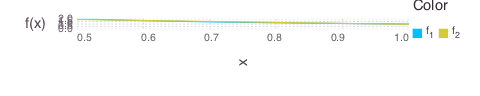

In [ ]:
using Gadfly
g(q) = 1/q
h(q) = 1/17 * (48 - 32q)
plot([g,h], 1/2, 1)

<p>It can be shown that we have for any $q$ in $[1/2, 1]$ with initial guess $x_0 = 48/17 - 32/17\cdot q$ that Newton's method will converge to 16 digits in no more than this many steps:</p>

<p>$$ \log_2(\frac{53 + 1}{\log_2(17)}). $$</p>

In [ ]:
a = log2((53 + 1)/log2(17))
ceil(Integer, a)

4

<p>That is 4 steps suffices.</p>

<h3>Why?</h3>

<p>We can get a slightly bigger bound by estimating:</p>

<p>$$ |e_{n+1}| \leq \frac{f''(\xi)}{2f'(x_n)} e_n^2 \leq \frac{4}{2\cdot 1} e_n^2 $$</p>

<p>But $|e_0| \leq 1/17$, so we get</p>

In [ ]:
e0 = 1/17
e1 = 2*e0^2; e2 = 2*e1^2; e3=2*e2^2;e4=2*e3^2;e5=2*e4^2;
(e1,e2,e3,e4,e5)

(0.006920415224913495,9.578429377042899e-5,1.8349261866199686e-8,6.7339082206874e-16,9.06910398492827e-31)

<p>So between 4 and 5 steps, so 5 steps would suffice.</p>

<p>(The better answer comes from computing that in this case this is exact: $e_{n+1} = e_n^2$.)</p>

<h3>Let's see...</h3>

<p>For $q = 0.80$, to find $1/q$ using the above we have</p>

In [ ]:
q = 0.80
x = (1/17) * (48 - 32q)
x = -q*x*x + 2*x
x = -q*x*x + 2*x
x = -q*x*x + 2*x
x = -q*x*x + 2*x

1.25

<p>Timing this shows the method to be slightly faster than a regular division. </p>